In [17]:
from urllib import request    # library for opening URLs using a variety of protocols

In [31]:
url = 'https://en.wikipedia.org/wiki/Natural_language_processing'

In [32]:
web = request.urlopen(url=url,)   # Open the URL url, which can be either a string or a Request object.

In [33]:
# read the entire document using .read() method of Http.client.httpResponse() class 
html = web.read()

In [49]:
type(html)

bytes

In [47]:
print(html[:5])     # Each letter is an index

## Total no. of Letters
len(html) 

b'<!DOC'


124177

In [50]:
# two sequential words contains a space so split them, then we get total no. of tokens
tokens = [token for token in html.split()]   

In [51]:
len(tokens)

7555

In [54]:
print(tokens[:50])

[b'<!DOCTYPE', b'html>', b'<html', b'class="client-nojs"', b'lang="en"', b'dir="ltr">', b'<head>', b'<meta', b'charset="UTF-8"/>', b'<title>Natural', b'language', b'processing', b'-', b'Wikipedia</title>', b'<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XjoN-wpAMEoAAA6ts-AAAACE","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural', b'language', b'processing","wgCurRevisionId":937763725,"wgRevisionId":937763725,"wgArticleId":21652,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":

#### As we can see there are some html tags, special characters, and much more...  that we will not consider as a raw text data

### Hence we will gonna be used regular expression to filter out these text , 
#### so import re

In [55]:
# import re
import re

In re module we have many useful functions to filter out any text

In [59]:
# re.split(pattern, string, maxsplit=0, flags=0)

tokens = re.split(r'\W+', str(html))        #Split the Non ALphaNumeric string by the occurrences of the pattern

In [78]:
print(tokens[:100])

['b', 'DOCTYPE', 'html', 'n', 'html', 'class', 'client', 'nojs', 'lang', 'en', 'dir', 'ltr', 'n', 'head', 'n', 'meta', 'charset', 'UTF', '8', 'n', 'title', 'Natural', 'language', 'processing', 'Wikipedia', 'title', 'n', 'script', 'document', 'documentElement', 'className', 'client', 'js', 'RLCONF', 'wgBreakFrames', '1', 'wgSeparatorTransformTable', 'wgDigitTransformTable', 'wgDefaultDateFormat', 'dmy', 'wgMonthNames', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'wgMonthNamesShort', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'wgRequestId', 'XjoN', 'wpAMEoAAA6ts', 'AAAACE', 'wgCSPNonce', '1', 'wgCanonicalNamespace', 'wgCanonicalSpecialPageName', '1', 'wgNamespaceNumber', '0', 'wgPageName', 'Natural_language_processing', 'wgTitle', 'Natural', 'language', 'processing', 'wgCurRevisionId', '937763725', 'wgRevisionId', '937763725', 'wgArticleId', '21652', 'wgIsArticle', '0', 

In [62]:
len(tokens)

21350

#### in these tokens special characters has been removed by regular expression but tag_names still presented like "html", 'title'... to overcome this problem we will gonna be used Beautifulsoup library 

# Python || Beautiful soup

In [63]:
from bs4 import BeautifulSoup

In [64]:
soup = BeautifulSoup(html, "html.parser")

In [66]:
len(soup)

4

In [68]:
type(soup)

bs4.BeautifulSoup

In [125]:
contents = []
for i in soup.find_all(name='p'):
    contents.append(i.get_text())
contents

['Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.\n',
 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.\n',
 'The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.\nIn 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].\n',
 'The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translatio

In [117]:
print([i.split() for i in contents])

[['Natural', 'language', 'processing', '(NLP)', 'is', 'a', 'subfield', 'of', 'linguistics,', 'computer', 'science,', 'information', 'engineering,', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(natural)', 'languages,', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data.'], ['Challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition,', 'natural', 'language', 'understanding,', 'and', 'natural', 'language', 'generation.'], ['The', 'history', 'of', 'natural', 'language', 'processing', '(NLP)', 'generally', 'started', 'in', 'the', '1950s,', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods.', 'In', '1950,', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', '"Computing', 'Machinery', 'and', 'Intelligence"', 'which', 'proposed', 'what', 'is', 'now', 

## Python || nltk

In [141]:
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

In [160]:
tokens = word_tokenize(str(contents))
print(tokens)

['[', "'Natural", 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data.\\n', "'", ',', "'Challenges", 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', ',', 'natural', 'language', 'understanding', ',', 'and', 'natural', 'language', 'generation.\\n', "'", ',', "'The", 'history', 'of', 'natural', 'language', 'processing', '(', 'NLP', ')', 'generally', 'started', 'in', 'the', '1950s', ',', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods.\\nIn', '1950', ',', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', '``', 'Co

In [161]:
import string
remove_punctuation = [i for i in tokens if i not in string.punctuation]
print(remove_punctuation)

["'Natural", 'language', 'processing', 'NLP', 'is', 'a', 'subfield', 'of', 'linguistics', 'computer', 'science', 'information', 'engineering', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'natural', 'languages', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data.\\n', "'Challenges", 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural', 'language', 'understanding', 'and', 'natural', 'language', 'generation.\\n', "'The", 'history', 'of', 'natural', 'language', 'processing', 'NLP', 'generally', 'started', 'in', 'the', '1950s', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods.\\nIn', '1950', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', '``', 'Computing', 'Machinery', 'and', 'Intelligence', "''", 'which', 'proposed', 'what', 'is', 'now', '

In [175]:
from nltk.corpus import stopwords

In [176]:
stop_word = stopwords.words('english')
print(stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [177]:
remove_stop_word_token = [word for word in remove_punctuation if word not in stop_word]

In [178]:
freq_dist = nltk.FreqDist(remove_stop_word_token)          # Count each token 

In [179]:
freq_dist.most_common(20)                  # first 20 most common tokens

[('language', 22),
 ('natural', 17),
 ('processing', 14),
 ('systems', 14),
 ('machine', 12),
 ('``', 10),
 ('translation', 10),
 ('statistical', 9),
 ('rules', 9),
 ('learning', 9),
 ("''", 8),
 ('many', 8),
 ('data', 8),
 ('algorithms', 8),
 ('models', 8),
 ('research', 7),
 ('input', 7),
 ('tasks', 7),
 ('results', 6),
 ("'The", 4)]

In [180]:
freq_dist['natural']                           # Frequency count of Token : "natural"

17

In [182]:
len(freq_dist)

512

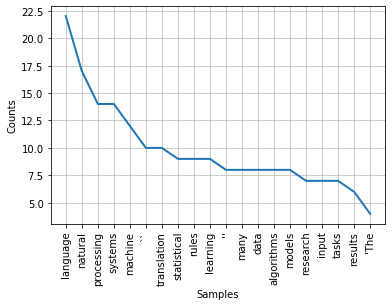

In [183]:
# plotting the frequeny of tokens
freq_dist.plot(20, cumulative =False)

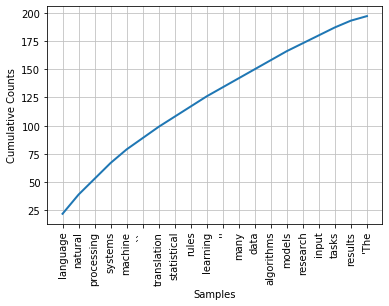

In [184]:
freq_dist.plot(20, cumulative =True)